In [7]:
Global warming is a world wide phenomenon. 
But put away your bathing suits, it’s not just about the earth getting warmer. 
Global warming impacts our everyday lives. 
These datasets in their entirety prove the direct correlation between global warming, increase of weather events, 
increase in rising seal levels and  overall ocean temperature. 
The effects of such a process have resulted in  an increase in global temperatures world wide and 
those effects on global ecological footprint, an increase in the occurrence of natural disasters and 
the rise of ocean temperature and sea level. All of which in turn pose great risk for the future of human kind.  
Hopefully by shedding light on these correlations we can get more people to take action now to 
prevent causing further harm to our atmosphere before its too late


SyntaxError: invalid character '’' (U+2019) (1322920464.py, line 2)

In [8]:
!pip install np 
!pip install npt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input') :
    for filename in filenames:
        print(os.path.join(dirname, filename))

python(60762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


python(60884) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [10]:
# Example data
data = {
    'Country': ['USA', 'Canada', 'Germany', 'China', 'Brazil'],
    'Carbon Footprint (tons per year)': [16.5, 15.7, 9.8, 7.5, 2.2],
    'Forest Footprint (hectares)': [0.5, 1.2, 0.7, 0.4, 0.9],
    'Water Footprint (cubic meters)': [1540, 1600, 1420, 1080, 990]
}

# Create the DataFrame
ecological_footprint = pd.DataFrame(data)

# Data Cleaning

In [2]:
ecological_footprint = pd.read_csv("Global Ecological Footprint 2023.csv", encoding='latin-1')
ecological_footprint.head()

,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Afghanistan,Middle East/Central Asia,52.5,62,0.48,NaN,LI,40.8,0.4,0.1,...,0.8,0.3,0.1,0.012981,0.000565,0.028232,0.513827,-0.287638,0.530696,1.559795
1,Albania,Other Europe,71.6,76,0.8,"$14,889",UM,2.9,0.8,0.2,...,2.1,0.6,0.2,0.223326,0.081392,0.073006,1.176752,-0.894486,1.371485,1.760131
2,Algeria,Africa,71.5,76,0.75,"$11,137",UM,45.4,0.7,0.2,...,2.2,0.4,0.2,0.023912,0.007179,0.037775,0.663375,-1.559593,1.471955,3.350998
3,Angola,Africa,50.9,62,0.59,"$6,304",LM,35,0.2,0.1,...,0.9,0.2,0.8,0.416888,0.153499,0.061360,1.588191,0.730346,0.568029,0.540140
4,Antigua and Barbuda,Central America/Caribbean,NaN,78,0.79,"$18,749",HI,0.1,NaN,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,0.917277,-2.019458,1.944580,3.201578


In [3]:
print(ecological_footprint.columns)
print(ecological_footprint.dtypes)
print(ecological_footprint.shape)

Index(['Country', 'Region', 'SDGi', 'Life Exectancy', 'HDI', 'Per Capita GDP',
       'Income Group', 'Population (millions)', 'Cropland Footprint',
       'Grazing Footprint', 'Forest Product Footprint', 'Carbon Footprint',
       'Fish Footprint', 'Built up land',
       'Total Ecological Footprint (Consumption)', 'Cropland', 'Grazing land',
       'Forest land', 'Fishing ground', 'Built up land.1',
       'Total biocapacity ', 'Ecological (Deficit) or Reserve',
       'Number of Earths required', 'Number of Countries required'],
      dtype='object')
Country                                      object
Region                                       object
SDGi                                         object
Life Exectancy                               object
HDI                                          object
Per Capita GDP                               object
Income Group                                 object
Population (millions)                        object
Cropland Footprint      

In [4]:
# Rename the columns 
ecological_footprint.rename(columns={'Total biocapacity ': 'Total biocapacity'}, inplace=True)
ecological_footprint.rename(columns={'Life Exectancy': 'Life Expectancy'}, inplace=True)

# Removing '$' and ',' to convert'Per Capita GDP' to a numeric column 
ecological_footprint['Per Capita GDP'] = ecological_footprint['Per Capita GDP'].str.replace('$', '')
ecological_footprint['Per Capita GDP'] = ecological_footprint['Per Capita GDP'].str.replace(',', '')
ecological_footprint['Per Capita GDP']

0         NaN
1      14889 
2      11137 
3       6304 
4      18749 
        ...  
177       NaN
178    11032 
179     1780 
180       NaN
181       NaN
Name: Per Capita GDP, Length: 182, dtype: object

In [5]:
# Convert non-numeric columns to numeric
columns_to_convert = ['SDGi', 'Life Expectancy', 'HDI', 'Population (millions)', 'Per Capita GDP']

for col in columns_to_convert:
    ecological_footprint[col] = pd.to_numeric(ecological_footprint[col], errors='coerce')


## Dealing with missing data

In [6]:
# Check for missing values
missing_data = ecological_footprint.isna().sum()
percent_missing = (missing_data / len(ecological_footprint)) * 100

# Display columns with missing data and their percentages
missing_df = pd.DataFrame({'Column name':missing_data.index, 'Missing %':percent_missing.values})
missing_df = missing_df[missing_df['Missing %'] > 0]
missing_df = missing_df.sort_values(by='Missing %', ascending=False)
print("Columns with missing data:")
print(missing_df)

Columns with missing data:
                                 Column name  Missing %
13                             Built up land  16.483516
15                                  Cropland  16.483516
19                           Built up land.1  16.483516
18                            Fishing ground  16.483516
17                               Forest land  16.483516
16                              Grazing land  16.483516
8                         Cropland Footprint  16.483516
9                          Grazing Footprint  16.483516
10                  Forest Product Footprint  16.483516
11                          Carbon Footprint  16.483516
12                            Fish Footprint  16.483516
2                                       SDGi  13.186813
5                             Per Capita GDP  10.439560
4                                        HDI   6.043956
3                            Life Expectancy   3.846154
6                               Income Group   2.197802
7                    

In [7]:
# Find the countries with most amount of missing data 

missing_values_per_row = ecological_footprint.isnull().sum(axis=1)
# Create a new DataFrame with the counts
missing_values_df = pd.DataFrame({'Row': missing_values_per_row.index, 'Missing Values': missing_values_per_row.values})
# Add the 'Name' column to the DataFrame with missing values counts
missing_values_df['Country'] = ecological_footprint['Country']
missing_values_df= missing_values_df[missing_values_df['Missing Values']>0]
# Sort the DataFrame by the number of missing values
sorted_missing_values_df = missing_values_df.sort_values(by='Missing Values', ascending=False)
print("Countries with most amount of missing data:")
print(sorted_missing_values_df)


Countries with most amount of missing data:
     Row  Missing Values                                 Country
17    17              19                                 Bermuda
60    60              16                           French Guiana
105  105              16                              Martinique
134  134              16                                 Réunion
69    69              16                              Guadeloupe
61    61              14                        French Polynesia
36    36              12                                 Comoros
170  170              12                                 Ukraine
47    47              12                                Dominica
27    27              12                              Cabo Verde
139  139              12            Saint Vincent and Grenadines
68    68              12                                 Grenada
4      4              12                     Antigua and Barbuda
107  107              11                      

I will drop all the rows which have more than 11 missing columns and will impute the rest

In [5]:
# Load data from a CSV file with 'latin-1' encoding
ecological_footprint = pd.read_csv('Global Ecological Footprint 2023 2', encoding='latin-1')


# Drop rows with more than 11 missing columns
import pandas as pd

# Assuming ecological_footprint is already loaded or created as a DataFrame

# Drop rows with more than 11 missing values
ecological_footprint = ecological_footprint.dropna(thresh=ecological_footprint.shape[1] - 11 + 1)
ecological_footprint = ecological_footprint.dropna(thresh=ecological_footprint.shape[1]-11+1)

# Print the shape of the cleaned dataset
print("Shape of the cleaned dataset:", ecological_footprint.shape)

import pandas as pd

# Load data from a CSV file with 'latin-1' encoding
ecological_footprint = pd.read_csv Global Ecological Footprint 2023, encoding='latin-1'

# Print the DataFrame
print(ecological_footprint)

SyntaxError: invalid syntax (2763941200.py, line 20)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
ecological_footprint = pd.read_csv Global Ecological Footprint 2023 
plt.figure(figsize=(6, 6))
sns.pairplot(ecological_footprint[['Cropland Footprint', 'Grazing Footprint', 'Forest Product Footprint', 'Carbon Footprint', 'Fish Footprint']])
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4142649223.py, line 3)

In [ ]:
# Imputing the rest of the columns
import numpy as np

# Define the data type for the array
dtype = np.int32

# Create an array with the specified data type
arr = np.array([1, 2, 3], dtype=dtype)

# Print the array
print(arr)


def __array__(
          self, dtype: np.DTypeLike | None = None, copy: bool_t | None = None
        ) -> np.ndarray:
            values = self._values
            arr = np.asarray(values, dtype=dtype)
            if (astype_is_view(values.dtype, arr.dtype)):
               using_copy_on_write()

from sklearn.impute import KNNImputer
# Let us imput the rest of the columns 
columns_to_impute = ecological_footprint.columns[ecological_footprint.isnull().any()].tolist()
# Initialize the KNN imputer with k=5 (5 nearest neighbors)
imputer = KNNImputer(n_neighbors=5)
# Fit and transform the data
ecological_footprint[columns_to_impute] = imputer.fit_transform(ecological_footprint[columns_to_impute])


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Example data
data = {
    'Country': ['USA', 'Canada', 'Germany', 'China', 'Brazil'],
    'Carbon Footprint (tons per year)': [16.5, 15.7, 9.8, 7.5, 2.2],
    'Forest Footprint (hectares)': [0.5, 1.2, 0.7, 0.4, 0.9],
    'Water Footprint (cubic meters)': [1540, 1600, 1420, 1080, 990]
}

# Create the DataFrame
ecological_footprint = pd.DataFrame(data)

# Create an array with the specified data type
arr = np.array([1, 2, 3], dtype=dtype)


import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Create an array with specified data type
dtype = np.int32
arr = np.array([1, 2, 3], dtype=dtype)
print(arr)  # Prints the array

# Assuming 'ecological_footprint' is a pandas DataFrame and has been loaded correctly.
# ecological_footprint = pd.read_csv('path_to_your_file.csv')  # Uncomment and adjust to load your data

# Identify columns with missing values to impute
columns_to_impute = ecological_footprint.columns[ecological_footprint.isnull().any()].tolist()

# Initialize the KNN imputer with k=5 (5 nearest neighbors)
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data on the columns with missing values
ecological_footprint[columns_to_impute] = imputer.fit_transform(ecological_footprint[columns_to_impute])

# Optional: Print the DataFrame to check the imputation
print(ecological_footprint.head())

In [12]:
# Check if there are any remaining missing values
print("Missing values after imputation:")
print(ecological_footprint.isnull().sum())

Missing values after imputation:
Country                                      0
Region                                       0
SDGi                                        23
Life Exectancy                               6
HDI                                          9
Per Capita GDP                              17
Income Group                                 4
Population (millions)                        0
Cropland Footprint                          30
Grazing Footprint                           30
Forest Product Footprint                    30
Carbon Footprint                            30
Fish Footprint                              30
Built up land                               30
Total Ecological Footprint (Consumption)     1
Cropland                                    30
Grazing land                                30
Forest land                                 30
Fishing ground                              30
Built up land.1                             30
Total biocapacity          

# Exploratory Visualizations

In [11]:
ecological_footprint.describe()

,SDGi,Life Expectancy,HDI,Per Capita GDP,Population (millions),Cropland Footprint,Grazing Footprint,Forest Product Footprint,Carbon Footprint,Fish Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,...,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,66.296316,70.851316,0.714316,21512.334211,31.838553,0.582895,0.270395,0.428289,1.533553,0.146053,...,3.048026,0.510526,0.402632,1.523629,0.431970,0.088023,2.962998,-0.084771,2.018103,2.767747
std,11.486051,7.739894,0.157319,22642.809968,52.293496,0.345218,0.431513,0.565968,1.771703,0.434274,...,2.326153,0.543372,0.858842,5.786458,0.907075,0.086141,6.622550,6.686007,1.540945,5.175730
min,0.000000,53.000000,0.390000,733.000000,0.200000,0.100000,0.000000,0.000000,0.000000,0.000000,...,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104127,-12.087339,0.366855,0.041945
25%,59.375000,64.750000,0.587500,4950.750000,4.975000,0.300000,0.100000,0.200000,0.300000,0.000000,...,1.200000,0.200000,0.100000,0.070767,0.017074,0.038711,0.677154,-1.787555,0.776874,0.813477
50%,67.900000,72.000000,0.730000,14715.500000,11.450000,0.500000,0.200000,0.200000,0.900000,0.100000,...,2.300000,0.300000,0.100000,0.315186,0.102650,0.065621,1.386204,-0.498462,1.538250,1.740634
75%,73.550000,76.000000,0.840000,31097.000000,34.550000,0.800000,0.300000,0.500000,2.200000,0.100000,...,4.200000,0.600000,0.300000,1.182957,0.292881,0.110695,2.734813,0.322828,2.754213,2.517007
max,86.500000,84.000000,0.960000,120505.000000,334.800000,1.900000,4.700000,4.300000,11.600000,5.100000,...,13.100000,2.800000,6.800000,67.949961,6.479269,0.541117,74.838452,71.699357,8.691697,55.106187


## Visualize the pairwise relationships between  Ecological Footprint factors

# Visualizing distribution of numerical columns

## Insights: 

Based on the histograms, we can see that the distribution of most variables is right-skewed, indicating that the majority of countries have lower values for these metrics. For variables like SDGi, HDI, and Per Capita GDP, the distributions are more symmetrical or slightly right-skewed, suggesting that most countries have moderate to high values for these indices. The population distribution shows that most countries have smaller populations, with a few outliers having larger populations. 

# Distribution of Countries by Region

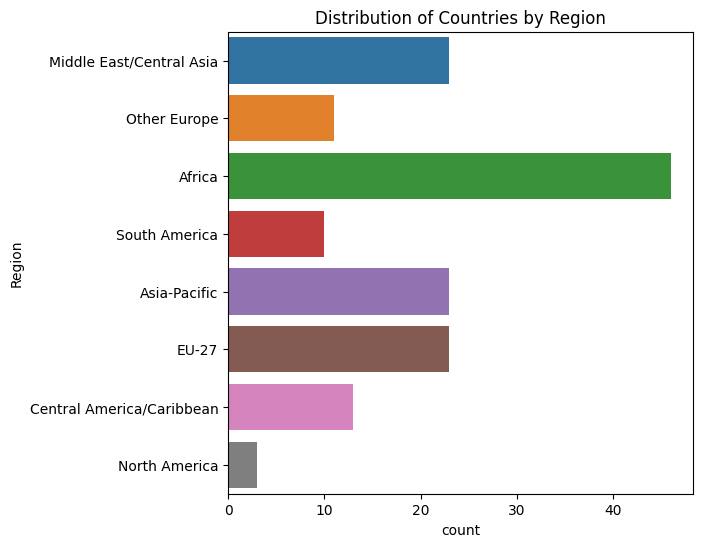

In [14]:
# Explore relationships between categorical columns
plt.figure(figsize=(6, 6))
sns.countplot(y='Region', data=ecological_footprint)
plt.title('Distribution of Countries by Region')
plt.show()

We see most of the countries present in the dataset are from Africa region.

## Distribution of Countries by Income groups

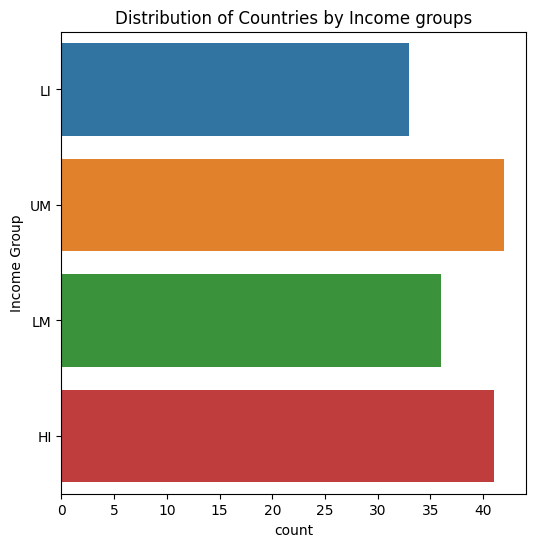

In [15]:
# Explore relationships between categorical columns
plt.figure(figsize=(6, 6))
sns.countplot(y='Income Group', data=ecological_footprint)
plt.title('Distribution of Countries by Income groups')
plt.show() average earths required per bucket 
plt.save()

# Correlation calculation

In [16]:
# Exclude non-numeric columns from correlation calculation
numerical_cols = ecological_footprint.select_dtypes(include=['float64', 'int64']).columns
corr = ecological_footprint[numerical_cols].corr()
plt.figure(figsize=(5, 5))
# Show the strength of the relationship
corr.style.background_gradient(cmap='coolwarm')

,SDGi,Life Expectancy,HDI,Per Capita GDP,Population (millions),Cropland Footprint,Grazing Footprint,Forest Product Footprint,Carbon Footprint,Fish Footprint,Built up land,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
SDGi,1.000000,0.750866,0.796509,0.578056,0.027510,0.554678,-0.018670,0.347051,0.430307,0.095796,0.304499,0.518648,0.394297,-0.071934,0.089564,0.200790,0.263884,0.133129,-0.049040,0.519748,0.119792
Life Expectancy,0.750866,1.000000,0.910234,0.745572,-0.032314,0.512792,0.004067,0.230066,0.616062,0.134177,0.319526,0.634645,0.248732,-0.076534,0.017966,0.152945,0.266355,0.050996,-0.170690,0.635522,0.327234
HDI,0.796509,0.910234,1.000000,0.791190,-0.002321,0.600486,0.049150,0.317303,0.676772,0.130531,0.359345,0.725892,0.373360,-0.008388,0.067319,0.228591,0.311132,0.124282,-0.129681,0.726255,0.282087
Per Capita GDP,0.578056,0.745572,0.791190,1.000000,-0.027842,0.513001,0.034698,0.271269,0.815609,0.088777,0.263116,0.793212,0.208181,-0.069289,0.006924,0.209546,0.238397,0.046489,-0.230169,0.793579,0.494457
Population (millions),0.027510,-0.032314,-0.002321,-0.027842,1.000000,-0.022760,-0.120991,-0.117568,-0.036436,-0.062934,-0.056569,-0.093419,0.090834,-0.103217,-0.061183,-0.132798,-0.087314,-0.079025,-0.045688,-0.093624,-0.062934
Cropland Footprint,0.554678,0.512792,0.600486,0.513001,-0.022760,1.000000,0.032588,0.456688,0.404387,0.032235,0.315507,0.590436,0.647748,-0.148609,-0.001156,0.125692,0.300815,0.055120,-0.150909,0.590425,0.075092
Grazing Footprint,-0.018670,0.004067,0.049150,0.034698,-0.120991,0.032588,1.000000,-0.017699,0.092176,-0.017414,-0.029695,0.254908,0.040598,0.738942,0.062632,0.022991,-0.023282,0.156789,0.067073,0.253481,-0.016599
Forest Product Footprint,0.347051,0.230066,0.317303,0.271269,-0.117568,0.456688,-0.017699,1.000000,0.164886,-0.004527,0.203569,0.438105,0.484197,-0.030264,0.194678,0.429915,0.219914,0.268876,0.113673,0.438571,-0.117417
Carbon Footprint,0.430307,0.616062,0.676772,0.815609,-0.036436,0.404387,0.092176,0.164886,1.000000,0.142409,0.224924,0.911372,0.154274,-0.042929,0.018075,0.199507,0.237543,0.054011,-0.263769,0.911521,0.443363
Fish Footprint,0.095796,0.134177,0.130531,0.088777,-0.062934,0.032235,-0.017414,-0.004527,0.142409,1.000000,0.047348,0.291952,0.001019,-0.082715,0.006500,0.109981,0.040918,0.010026,-0.092072,0.293056,0.086806


<Figure size 500x500 with 0 Axes>

# HDI vs Total Ecological Footprint
## Hypothesis : Countries with higher HDI per capita have a higher total ecological footprint.

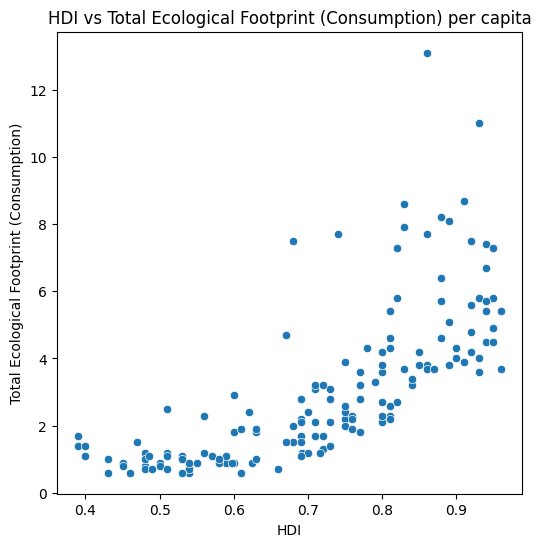

Correlation coefficient between HDI and Total Ecological Footprint (Consumption): 0.7258920891346563


In [17]:
# Scatter plot of HDI vs Total Ecological Footprint (Consumption) per capita
plt.figure(figsize=(6, 6))
sns.scatterplot(x='HDI', y='Total Ecological Footprint (Consumption)', data=ecological_footprint)
plt.title('HDI vs Total Ecological Footprint (Consumption) per capita')
plt.show()

# Calculate the correlation coefficient
correlation = ecological_footprint['HDI'].corr(ecological_footprint['Total Ecological Footprint (Consumption)'])
print(f"Correlation coefficient between HDI and Total Ecological Footprint (Consumption): {correlation}")


Conclusion: From the scatter plot and correlation analysis, there appears to be a positive correlation between HDI per capita and total ecological footprint. This suggests that countries with higher HDI per capita tend to have a higher total ecological footprint.

#  GDP per capita vs Total Ecological Footprint
## Hypothesis : Countries with higher GDP per capita have a higher total ecological footprint.

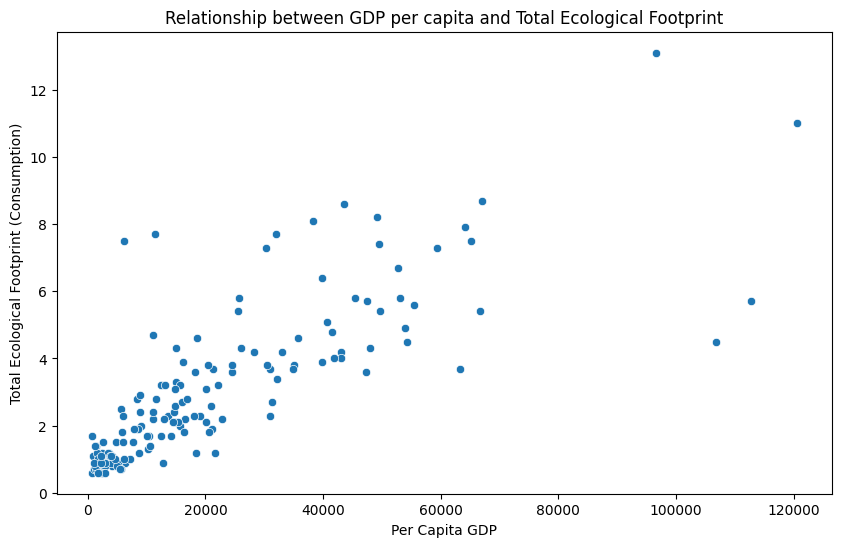

Correlation between Per Capita GDP and Total Ecological Footprint: 0.7932120081107453


In [18]:
# Plotting the relationship between GDP per capita and Total Ecological Footprint
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Per Capita GDP', y='Total Ecological Footprint (Consumption)', data=ecological_footprint)
plt.title('Relationship between GDP per capita and Total Ecological Footprint')
plt.xlabel('Per Capita GDP')
plt.ylabel('Total Ecological Footprint (Consumption)')
plt.show()

# Calculating the correlation coefficient
correlation = ecological_footprint['Per Capita GDP'].corr(ecological_footprint['Total Ecological Footprint (Consumption)'])
print(f"Correlation between Per Capita GDP and Total Ecological Footprint: {correlation}")


Conclusion: From the scatter plot and correlation analysis, there appears to be a positive correlation between GDP per capita and total ecological footprint. This suggests that countries with higher GDP per capita tend to have a higher total ecological footprint.

# Income Groups vs Total Ecological Footprint  
## Hypothesis : There is a difference in ecological footprint between income groups.

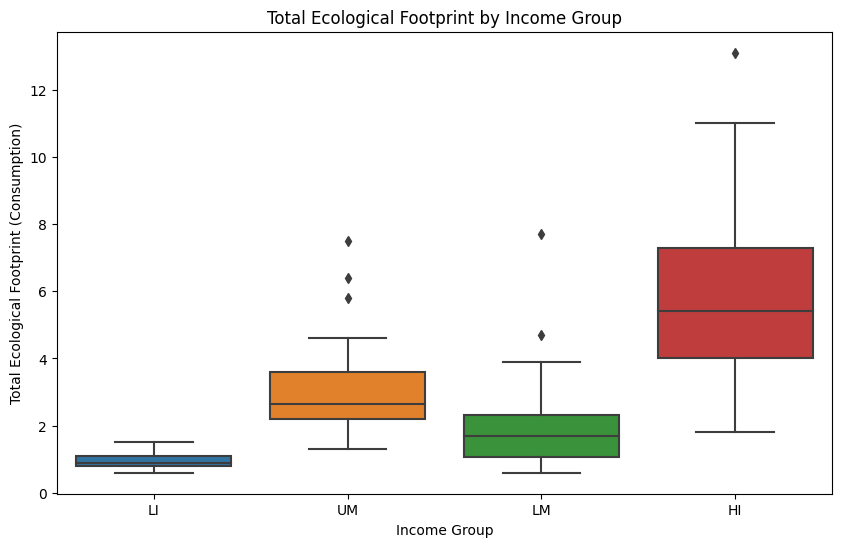

One-way ANOVA p-value: 2.223523670490399e-28


In [19]:
# Box plot to compare ecological footprint between income groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Group', y='Total Ecological Footprint (Consumption)', data=ecological_footprint)
plt.title('Total Ecological Footprint by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Total Ecological Footprint (Consumption)')
plt.show()

# ANOVA test to determine significance
import scipy.stats as stats
f_statistic, p_value = stats.f_oneway(
    ecological_footprint.loc[ecological_footprint['Income Group'] == 'LI', 'Total Ecological Footprint (Consumption)'],
    ecological_footprint.loc[ecological_footprint['Income Group'] == 'LM', 'Total Ecological Footprint (Consumption)'],
    ecological_footprint.loc[ecological_footprint['Income Group'] == 'UM', 'Total Ecological Footprint (Consumption)'],
    ecological_footprint.loc[ecological_footprint['Income Group'] == 'HI', 'Total Ecological Footprint (Consumption)']
)
print(f"One-way ANOVA p-value: {p_value}")



Conclusion: The box plot shows variations in the total ecological footprint between income groups. 
The p-value for the one-way ANOVA test comparing the total ecological footprint between income groups is extremely small (2.22e-28), indicating strong evidence against the null hypothesis. This means that there is a statistically significant difference in the total ecological footprint between at least two income groups. 

# Population vs Total Ecological Footprint
## Hypothesis: There is a correlation between population size and total ecological footprint.

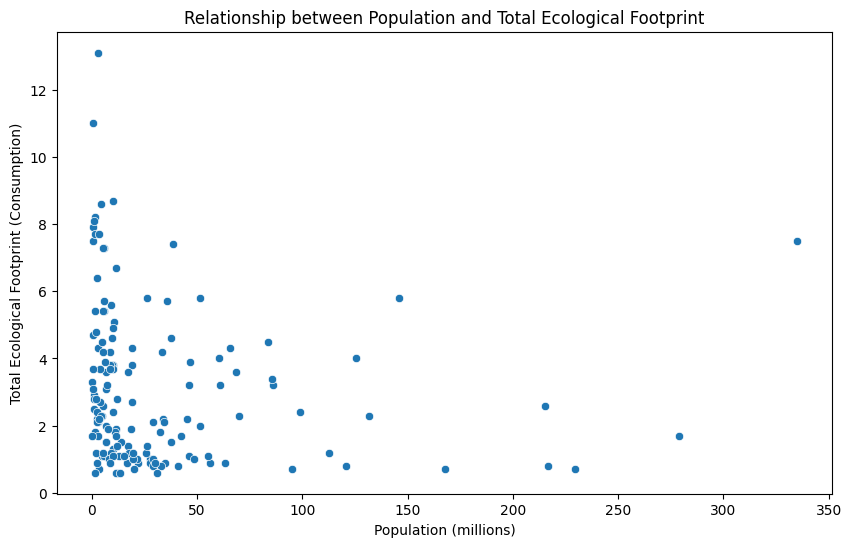

Correlation between Population and Total Ecological Footprint: -0.09341915827577413


In [20]:
# Plotting the relationship between Population (millions) and Total Ecological Footprint
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population (millions)', y='Total Ecological Footprint (Consumption)', data=ecological_footprint)
plt.title('Relationship between Population and Total Ecological Footprint')
plt.xlabel('Population (millions)')
plt.ylabel('Total Ecological Footprint (Consumption)')
plt.show()


# Calculating the correlation coefficient
correlation = ecological_footprint['Population (millions)'].corr(ecological_footprint['Total Ecological Footprint (Consumption)'])
print(f"Correlation between Population and Total Ecological Footprint: {correlation}")


Conclusion: The scatter plot shows no clear pattern between population size and total ecological footprint. The correlation analysis indicates a weak positive correlation, suggesting that countries with larger populations tend to have slightly higher total ecological footprints, but the relationship is not strong.

# Region vs Total Ecological Footprint
## Hypothesis : Countries in certain regions have higher ecological footprints than others.

In [30]:
import seaborn as sns 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input') :
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load data from a CSV file
ecological_footprint = pd.read_csv('Users/cmatthews/Desktop/Data-Analyst/Projects/Global Ecological Footprint 2023 .csv')


# Print the DataFrame
print(ecological_footprint)

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x="Region", y="Global Ecological Footprint Data", data=ecological_footprint, ci=None)

# Set the title and labels
plt.title('Total Ecological Footprint by Region')
plt.xlabel('Region')
plt.ylabel('Total Ecological Footprint (Consumption)')
plt.xticks(rotation=45)

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Users/cmatthews/Desktop/Data-Analyst/Projects/Global Ecological Footprint 2023 .csv'

In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Print the list of files in the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load data from a CSV file
ecological_footprint = pd.read_csv('Users/cmatthews/Desktop/Data-Analyst/Projects/Global Ecological Footprint 2023.csv')

# Print the first few rows of the DataFrame to verify data loading
print(ecological_footprint.head())

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x="Region", y="Global Ecological Footprint Data", data=ecological_footprint, ci=None)

# Set the title and labels
plt.title('Total Ecological Footprint by Region')
plt.xlabel('Region')
plt.ylabel('Total Ecological Footprint (Consumption)')
plt.xticks(rotation=45)

# Show the plot
plt.show()

python(73805) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


FileNotFoundError: [Errno 2] No such file or directory: 'Users/cmatthews/Desktop/Data-Analyst/Projects/Global Ecological Footprint 2023.csv'

There are differences in the Total Ecological Footprint (Consumption) between regions, as shown by the box plot. Some regions have higher median ecological footprints than others, indicating regional differences in resource consumption and waste generation.

# HDI vs Total Ecological Footprint
## Hypothesis : Life expectancy is positively correlated with ecological footprint


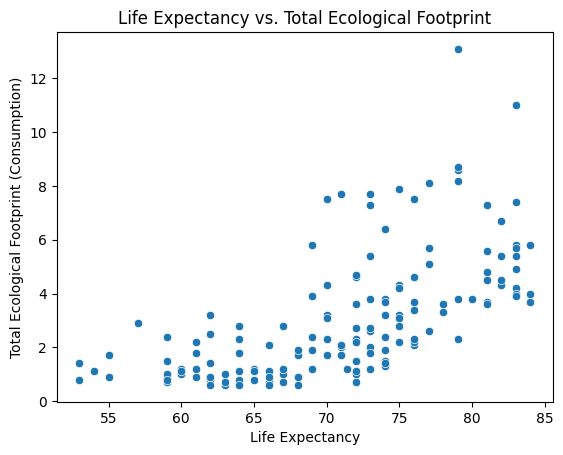

Correlation between Life Expectancy and Total Ecological Footprint: 0.6346448809514798


In [22]:
sns.scatterplot(data=ecological_footprint, x='Life Expectancy', y='Total Ecological Footprint (Consumption)')
plt.title('Life Expectancy vs. Total Ecological Footprint')
plt.show()

# Calculating the correlation coefficient
correlation = ecological_footprint['Life Expectancy'].corr(ecological_footprint['Total Ecological Footprint (Consumption)'])
print(f"Correlation between Life Expectancy and Total Ecological Footprint: {correlation}")

The correlation coefficient of 0.635 indicates a moderately strong positive correlation between life expectancy and total ecological footprint. This suggests that countries with higher life expectancies tend to have higher total ecological footprints, and vice versa. However, correlation does not imply causation, so further analysis would be needed to understand the underlying factors contributing to this relationship.

# SDGi vs Total Ecological Footprint
## Hypothesis : SDGi is positively correlated with ecological footprint

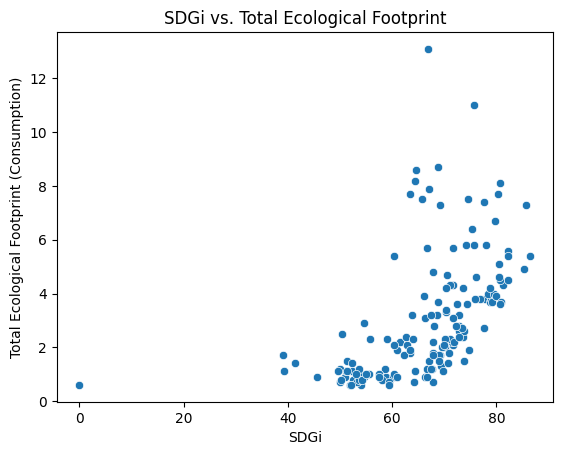

Correlation between SDGi and Total Ecological Footprint: 0.5186483216051646


In [23]:
# Hypothesis 9: Relationship between ecological footprint and SDGi
sns.scatterplot(data=ecological_footprint, x='SDGi', y='Total Ecological Footprint (Consumption)')
plt.title('SDGi vs. Total Ecological Footprint')
plt.show()

# Calculating the correlation coefficient
correlation = ecological_footprint['SDGi'].corr(ecological_footprint['Total Ecological Footprint (Consumption)'])
print(f"Correlation between SDGi and Total Ecological Footprint: {correlation}")